**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [2]:
df=pd.read_csv('portfolio_data.csv')

In [3]:
df.head(3)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857


In [5]:
df.tail(3)

,Date,AMZN,DPZ,BTC,NFLX
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1519,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


**Dataset rows and columns**

In [6]:
df.shape

(1520, 5)

**Information on dataset**

In [7]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [9]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

**Null Values**

In [10]:
df.isna().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

**Duplicate Values**

In [11]:
df[df.duplicated()].sum()

Date      0
AMZN    0.0
DPZ     0.0
BTC     0.0
NFLX    0.0
dtype: object

***Visualizations from given dataset***

In [12]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

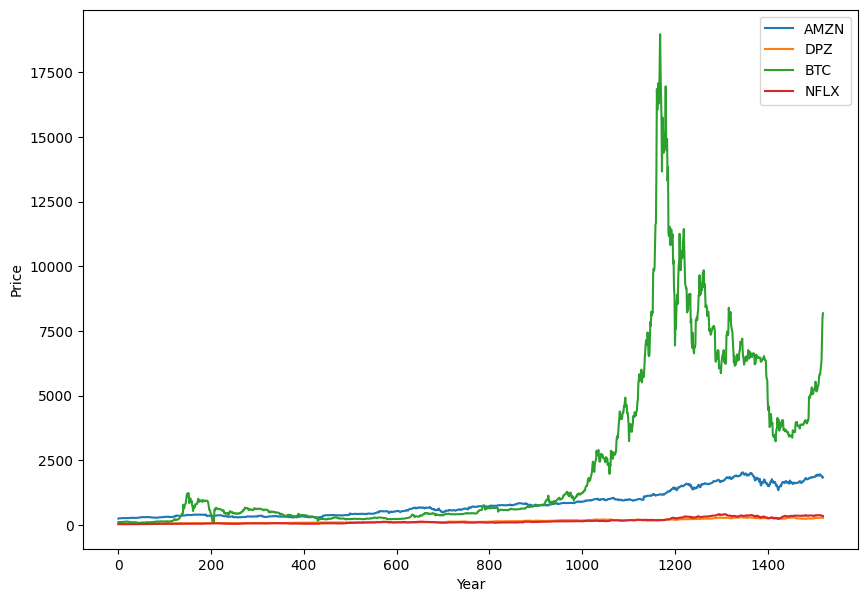

In [13]:
df.plot(figsize=(10, 7))
plt.legend()
plt.ylabel('Price')
plt.xlabel('Year')
plt.grid(which="minor", color='k', linestyle='-.', linewidth=0.5)
plt.show()

<b>Changing Date column as date time object for retriving year</b>

In [14]:
stock=df[['AMZN', 'DPZ', 'BTC', 'NFLX']]
tm=pd.to_datetime(df['Date'])
a=tm.dt.year
stock=df[['AMZN', 'DPZ', 'BTC', 'NFLX']].groupby(a,axis=0).sum()
stock

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013,53354.980132,10238.039138,4.557498e+04,6939.914250
2014,83802.860235,18662.841017,1.315143e+05,14488.769999
2015,120490.850372,25889.468637,6.857347e+04,23157.709951
2016,176279.829985,34080.648240,1.430813e+05,25711.650014
2017,243009.919923,46689.474365,9.993645e+05,41508.940028
2018,412073.270138,63464.624172,1.888551e+06,80141.870071
2019,159731.840092,24067.880586,4.039682e+05,32506.920008


<b>Variataion of Stock prices in accordance with each year</b>

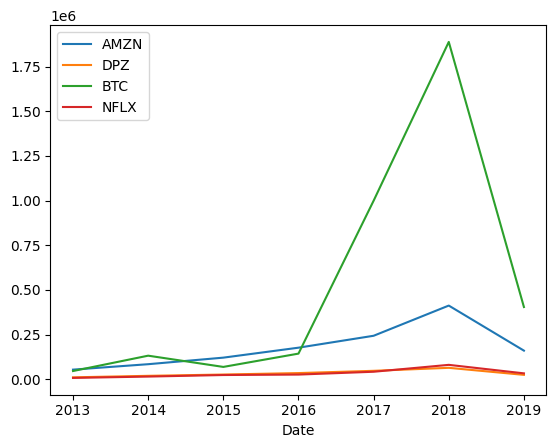

In [15]:
stock.plot()
plt.show()

<b>Bar Grpah of amzn stock price</b>

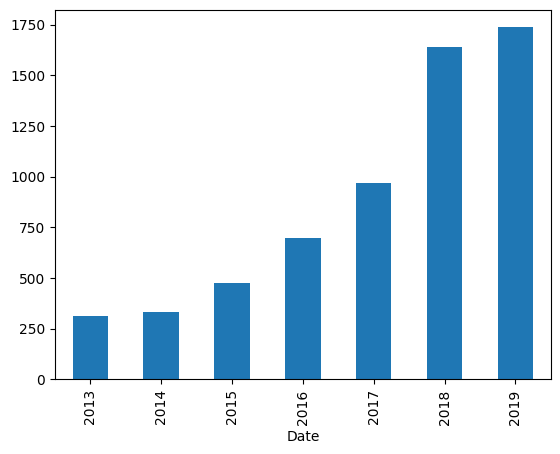

In [16]:
df.groupby(a)['AMZN'].mean().plot.bar()
plt.show()

<b>Variation of BTC prices of each day in a week</b>

<Axes: xlabel='Date'>

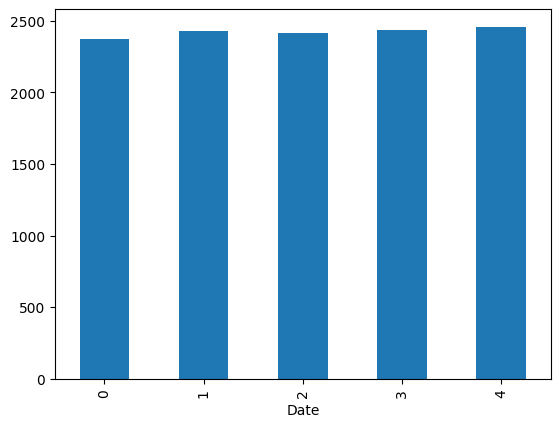

In [17]:
b=tm.dt.dayofweek
df.groupby(b)['BTC'].mean().plot.bar()

<b>Regression plot of all stock prices</b>

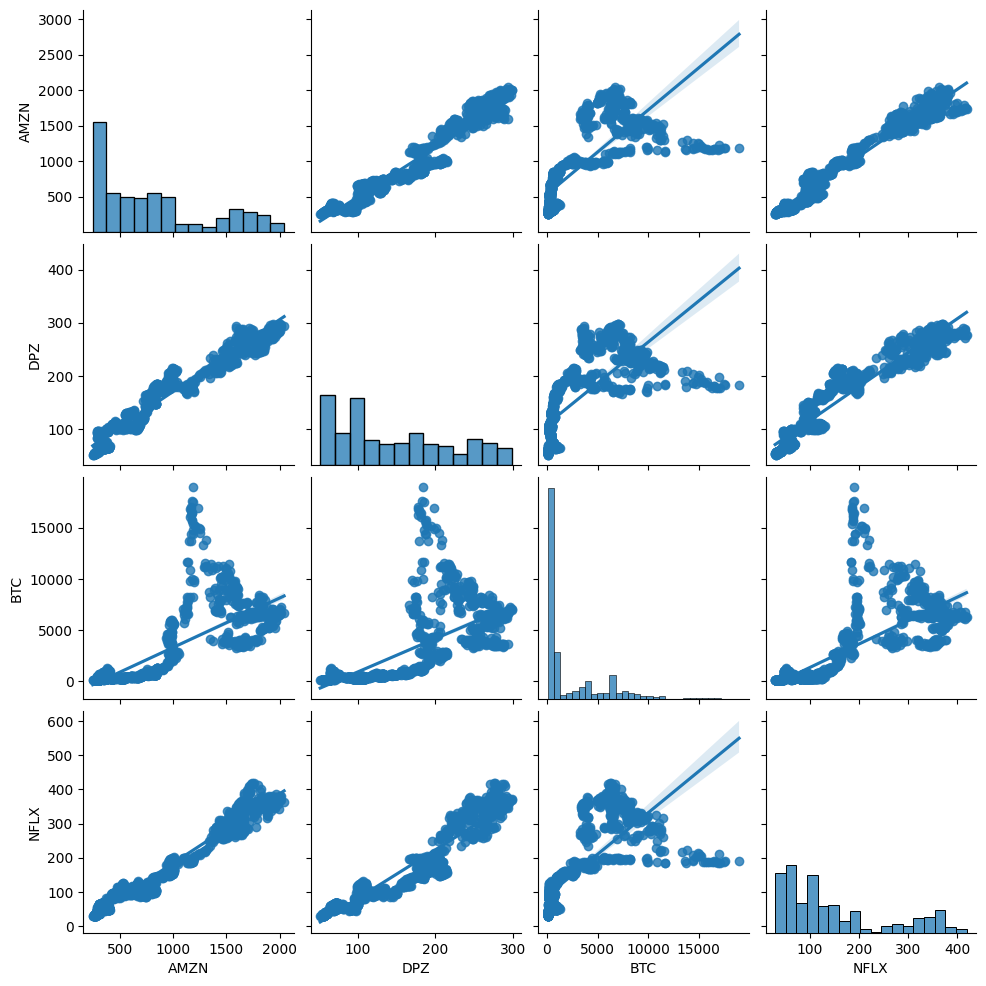

In [18]:
sns.pairplot(df,kind='reg')